In the first part, the focus will be on learning with a generalised delta rule for a two-layer perceptron. The generalised delta rule is also known as the error back-propagation algorithm or simply "backprop".

## MLP Implementation

-------------

In [1]:
import numpy as np

check the e!!!

In [2]:
from math import e

class TwoLayerPerceptron:
    def __init__(self, learning_rate, n_hidden):
        self.W = np.random.rand(n_hidden, 3)                 # W has columns as input nodes +1 and rows as hidden layers
        self.V = np.random.rand(1, n_hidden)                 # V has columns as hidden layers and 1 row (ie: one weight for each hidden layer)
        self.learning_rate = learning_rate
        self.epochs = 0

    def activation_function(self, input):
        return (2 / (1 + np.power(e, (-1) * input)) - 1)
    
    def grad(self, input):
        act_input = self.activation_function(input)
        return ((1 + act_input)*(1 - act_input) / 2)
    
    def backprop_update(self, x, t):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)
        
        # backward pass
        delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
        delta_h = (self.V.T @ delta_o) * self.grad(hin)     # (n_hidden, 1) x (1, n_samples) = (n_hidden, n_samples)
        delta_h = delta_h[1,:]                              # togli bias


        # weight update
        dW = (-1) * self.learning_rate * (delta_h @ x.T)    # (n_hidden, n_samples) x (n_samples, 3) = (n_hidden, 3)
        dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

        self.W += dW
        self.V += dV
    
    def fit(self, x, t, n_epochs):
        for _ in range(n_epochs):
            self.backprop_update(x, t)
            self.epochs += 1

    def predict(self, x):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)

        return out

### Part 3.1.1 - Classification of linearly non-separable data

The goal is to examine how well a two-layer perceptron trained with backprop performs in separating the two classes.

-----------

In [3]:
import numpy as np

ndata = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Generating data for class A
half_ndata = int(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :half_ndata] = np.random.randn(half_ndata) * sigmaA - mA[0]
classA[1, :half_ndata] = np.random.randn(half_ndata) * sigmaA + mA[1]
classA[0, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[0]
classA[1, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[1]

# Generating data for class B
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

In [4]:
classA = np.vstack((classA, - np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))

In [5]:
classA[:,:5]

array([[-0.87028242, -0.94152657, -0.99133982, -0.89278638, -1.22721905],
       [ 0.5706928 ,  0.46188089, -0.28436196, -0.12471728,  0.47000834],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [6]:
classB[:,:5]

array([[ 0.0691043 , -0.38243248, -0.35466051,  0.26417149,  0.52176323],
       [-0.37032818, -0.63243815, -0.65242477, -0.01598043, -0.48112349],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

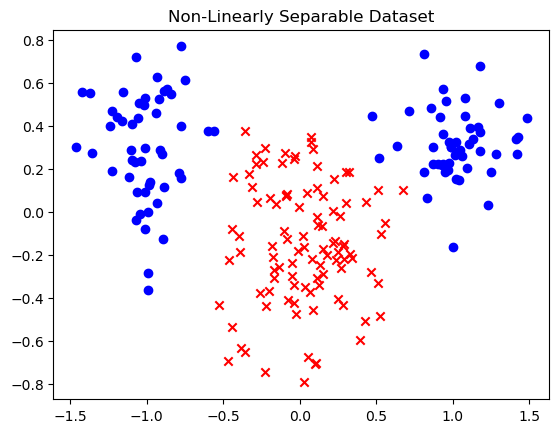

In [7]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.show()

### Experiment 1:
Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)?

---------------

In [8]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.87028242, -0.94152657, -0.99133982, -0.89278638, -1.22721905],
       [ 0.5706928 ,  0.46188089, -0.28436196, -0.12471728,  0.47000834],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [9]:
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.91655963,  0.95623247,  0.1146281 ,  0.0691043 , -0.16513304],
       [ 0.4425198 ,  0.51585329, -0.02253258, -0.37032818, -0.30481339],
       [-1.        , -1.        ,  1.        ,  1.        ,  1.        ]])

In [10]:
X_train = dataset[:3,:]
y_train = dataset[3,:]

*Let's try with 4 hidden layers*

In [11]:
perceptron_classifier = TwoLayerPerceptron(0.008, 4)

In [12]:
mse = []
accuracies = []
for e in range(200):
    perceptron_classifier.fit(X_train, y_train, 1)
    p = perceptron_classifier.predict(X_train)

    # MSE
    mse.append(np.sum((y_train - p)**2 / len(y_train)))

    # accuracy
    predictions = 2*(np.array(p > 0, dtype=int)) - 1
    accuracies.append(np.sum(predictions == y_train) / len(y_train))
    

/tmp/ipykernel_7289/2583779688.py:11: RuntimeWarning: divide by zero encountered in power
  return (2 / (1 + np.power(e, (-1) * input)) - 1)


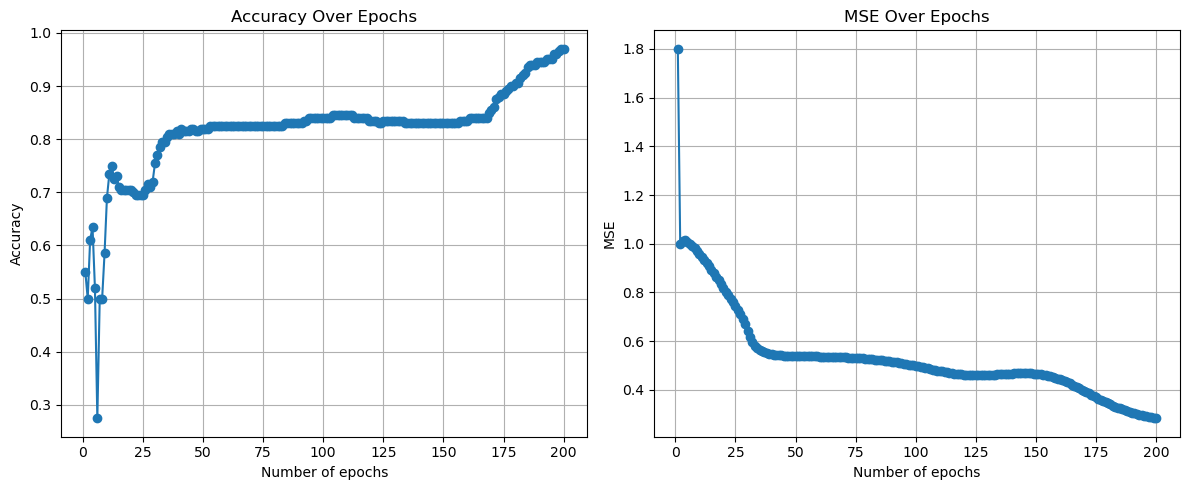

In [13]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies) + 1)
ax1.plot(x_values, accuracies, marker='o', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse) + 1)
ax2.plot(x_values, mse, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


*How many hidden nodes do we need to perfectly classify all the points?*

In [14]:
mse = []
accuracies = []
final_accuracies = []
for n in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    perceptron_classifier = TwoLayerPerceptron(0.01, n)
    for e in range(500):
        perceptron_classifier.fit(X_train, y_train, 1)
        p = perceptron_classifier.predict(X_train)

        # MSE
        mse.append(np.sum((y_train - p)**2 / len(y_train)))

        # accuracy
        predictions = 2*(np.array(p > 0, dtype=int)) - 1
        accuracies.append(np.sum(predictions == y_train) / len(y_train))

        if (e == 499):
            final_accuracies.append(np.sum(predictions == y_train) / len(y_train))


print(final_accuracies)
    

/tmp/ipykernel_7289/2583779688.py:11: RuntimeWarning: divide by zero encountered in power
  return (2 / (1 + np.power(e, (-1) * input)) - 1)


[0.74, 0.845, 0.61, 0.86, 0.75, 0.99, 0.98, 0.75, 0.97]


### Experiment 2:
Then, formulate a more realistic problem where only a subset of data points is available for training a network (data you use to calculate weight updates using backprop) and the remaining samples constitute a validation dataset for probing generalisation capabilites of the network. To do that, subsample the data for training according to the following scenarios:
- random 25% from each class
- random 50% from class A
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

Treat the removed samples as a validation set. Make sure you do not use this hold-out set in the training process and instead you only use it to
calculate the error (mean squared error or the ratio of misclassifications) at different stages/epochs of learning to monitor the progress.